# Intro to Keras: Neural Networks for Digit Classification
Online lesson link: http://caisplusplus.usc.edu/blog/curriculum/lesson5

#### Relevant guides:
* Getting started with Keras: https://keras.io/
* Sequential model guide: https://keras.io/getting-started/sequential-model-guide/

### Loading in MNIST

In [15]:
# Import MNIST dataset from Keras

from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [16]:
# Data exploration

print("Inputs shape is " + str(train_x.shape)) # 60,000 samples, each image: 28 x 28 pixels
print("Input type is " + str(type(train_x)))
print("Labels:")
print(train_y)
print("Labels shape is" + str(train_y.shape))
print("Labels type is " + str(type(train_y)))

Inputs shape is (60000, 28, 28)
Input type is <class 'numpy.ndarray'>
Labels:
[5 0 4 ..., 5 6 8]
Labels shape is(60000,)
Labels type is <class 'numpy.ndarray'>


In [17]:
# Matplotlib: Data visualization library
import matplotlib.pyplot as plt

5


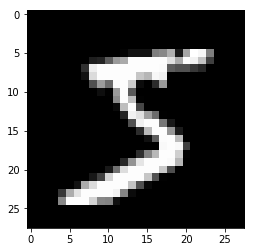

In [18]:
# Visualize the input samples

sample_num = 0

plt.imshow(train_x[sample_num], cmap=plt.get_cmap('gray'))
print(train_y[sample_num])
plt.show()

### Pre-Processing the Data: 
* Flatten the 28 x 28 images into 784-dimensional vectors
* Normalize the pixel values from 0-255 to 0-1
* Categorize the outputs into 10-dimensional "one-hot" vectors

In [19]:
# flatten 28*28 images to a 784 vector for each image

num_pixels = train_x.shape[1] * train_x.shape[2] # 28 * 28 = 784
train_x_flattened = train_x.reshape(train_x.shape[0], num_pixels).astype('float32') # new shape: 60,000 x 784
test_x_flattened = test_x.reshape(test_x.shape[0], num_pixels).astype('float32') # new shape: 10,000 x 784

In [20]:
# Normalize pixel values to between 0-1
train_x_flattened = train_x_flattened / 255.
test_x_flattened = test_x_flattened / 255.

In [21]:
import keras

# Use Keras to categorize the outputs ("one-hot" vectors)
train_y_categorical = keras.utils.to_categorical(train_y, num_classes=10)
test_y_categorical = keras.utils.to_categorical(test_y, num_classes=10)

# let's see result of categorizing the outputs
print(test_y_categorical[:5])


[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


### Creating our Neural Network Model
1. Initialize the model, add desired layers
2. Compile the model to get ready for training
3. Set up the callbacks to track the model training/improvement
4. Fit the model to the training data

In [24]:
from keras.layers import Dense, Activation
from keras.models import Sequential

# Initialize simple neural network model
model = Sequential()

# TODO: add layers to the model


# Hidden layer 1: 500 neurons, 'relu' activation
model.add(Dense(units=500, input_dim=784)) #dense/fully connected
model.add(Activation('relu'))

# Hidden layer 2: 250 neurons, 'relu' activation
model.add(Dense(units=250))
model.add(Activation('relu'))

# Output layer: 10 neurons (one for each class), softmax activation
model.add(Dense(units=10))
model.add(Activation('softmax'))#now apply softmax for total probabilities

In [25]:
# Compile the model, get ready to train

# TODO: compile the model
    # Loss: categorical cross-entropy
    # Optimizer: stochastic gradient descent (SGD)
    # Additional metrics: Accuracy
    
model.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
    

In [26]:
# Print model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               125250    
_________________________________________________________________
activation_4 (Activation)    (None, 250)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2510      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 520,260
Trainable params: 520,260
Non-trainable params: 0
_________________________________________________________________


#### Callback tools:
* **TQDM**: progress bar library
* **Tensorboard**: built-in tool to plot model loss, accuracy, etc.

In [86]:
# Import relevant libraries
from keras_tqdm import TQDMNotebookCallback # TQDM: progress bars
from keras.callbacks import TensorBoard # Tensorboard: training plots
    
# Clear any existing Tensorboard logs
import shutil
shutil.rmtree('./logs', ignore_errors=True)

# Set up callback links to refer back to during training
tensorboard = TensorBoard()
callbacks_list = [TQDMNotebookCallback(), tensorboard]

In [34]:
# Fit the model to the training data

# Validation split: reserve some of our training data to use as "validation" data
    # Won't train on validation data -- check validation loss to look for overfitting
    
# Pass in our callbacks to track training progress

# TODO: train the model
    # Number of epochs: 5 (how many times you cycle through)
    # Batch size: 32
    # Validation split: 0.1 ()
    # Verbose setting: use TQDM progress bars
    
model.fit(train_x_flattened, train_y_categorical,
         epochs = 5, batch_size = 32, validation_split = 0.1, verbose = 0,
          callbacks = callbacks_list)
    

HBox(children=(IntProgress(value=0, description='Training', max=5), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 1', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 2', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 3', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 4', max=54000), HTML(value='')))

**To launch Tensorboard after training:**
* Type in command line: `tensorboard --logdir ./logs`
* Open in browser: `http://localhost:6006`

### Evaluating the Model

In [37]:
# Evaluate trained model on test data

# returns final test loss & test accuracy
loss_and_metrics = model.evaluate(test_x_flattened, test_y_categorical, batch_size=128)

print(loss_and_metrics)

 9728/10000 [============================>.] - ETA: 0s[0.11603916993886232, 0.96530000000000005]


Lastly: Make sure the our neural network's predictions match up with the actual images

[[  9.97031569e-01   1.64807295e-06   1.02765298e-04   6.26012024e-06
    1.29609646e-06   2.57272227e-03   1.09369939e-04   9.55774567e-07
    1.03338607e-05   1.63106262e-04]]
0


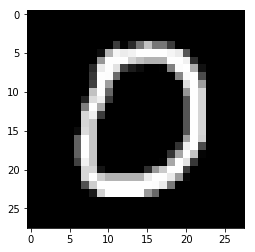

In [38]:
import numpy as np

sample_num = 10 # which test sample to look at

# Predicted class
test_sample = np.expand_dims(test_x_flattened[sample_num], axis=0) # pick out a one-sample "batch" to feed into model
predicted_scores = model.predict(test_sample) # outputted probabilities vector
print(predicted_scores) # print predicted scores

predicted_class = np.argmax(predicted_scores) # pick the class with highest probability --> final prediction
print(predicted_class) # print predicted classification


# Show actual input image
plt.imshow(test_x[sample_num], cmap=plt.get_cmap('gray'))
plt.show()